# Stable Diffusion Tutorial
### By Theophilus Owiti

With this brief notebook you will learn how to utilize stable diffusion for image generation and understand basic concepts around stable diffusion.

In [ ]:
#install packages you will need
!pip install tensorflow keras_cv --upgrade --quiet tensorflow_text torch transformers keras_hub
!pip install -U diffusers
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.1/792.1 kB 340.9 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
torchaudio 2.6.0+cpu requires torch==2.6.0, but you have torch 2.7.0 which is incompatible.
torchvision 0.21.0+cpu requires torch==2.6.0, but you have torch 2.7.0 which is incompatible.
  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB

In [ ]:
#import necessary libraries for the session
import os
import torch
from diffusers import StableDiffusion3Pipeline
os.environ["KERAS_BACKEND"] = "jax"
import time
import keras
import keras_hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# Let's bring in the text_to_image instance
text_to_image = keras_hub.models.StableDiffusion3TextToImage.from_preset(
   "stable_diffusion_3_medium", dtype="float16"
)

# text_to_image = StableDiffusion3Pipeline.from_pretrained(
#     "stabilityai/stable-diffusion-3-medium-diffusers",
#     torch_dtype=torch.float16
# )
# text_to_image = text_to_image.to("cuda")


In [ ]:
#Let's see some images using this guy down here
def display_generated_images(images):
    display_image = None
    if isinstance(images, np.ndarray):
        if images.ndim == 3:
            display_image = Image.fromarray(images)
        elif images.ndim == 4:
            concated_images = np.concatenate(list(images), axis=1)
            display_image = Image.fromarray(concated_images)
    elif isinstance(images, list):
        concated_images = np.concatenate(images, axis=1)
        display_image = Image.fromarray(concated_images)

    if display_image is None:
        raise ValueError("Unsupported input format.")

    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(display_image)
    plt.show()
    plt.close()



In [ ]:
#create the backbone, preprocessor and instance of text_to_image
backbone = keras_hub.models.StableDiffusion3Backbone.from_preset(
    "stable_diffusion_3_medium", image_shape=(512, 512, 3), dtype="float16"
)
preprocessor = keras_hub.models.StableDiffusion3TextToImagePreprocessor.from_preset(
    "stable_diffusion_3_medium"
)
text_to_image = keras_hub.models.StableDiffusion3TextToImage(backbone, preprocessor)

In [ ]:
#Let's speak our minds and take a picture of our imagination
prompt = "Brock Lesnar eating grilled meat"
generated_image = text_to_image.generate(prompt)

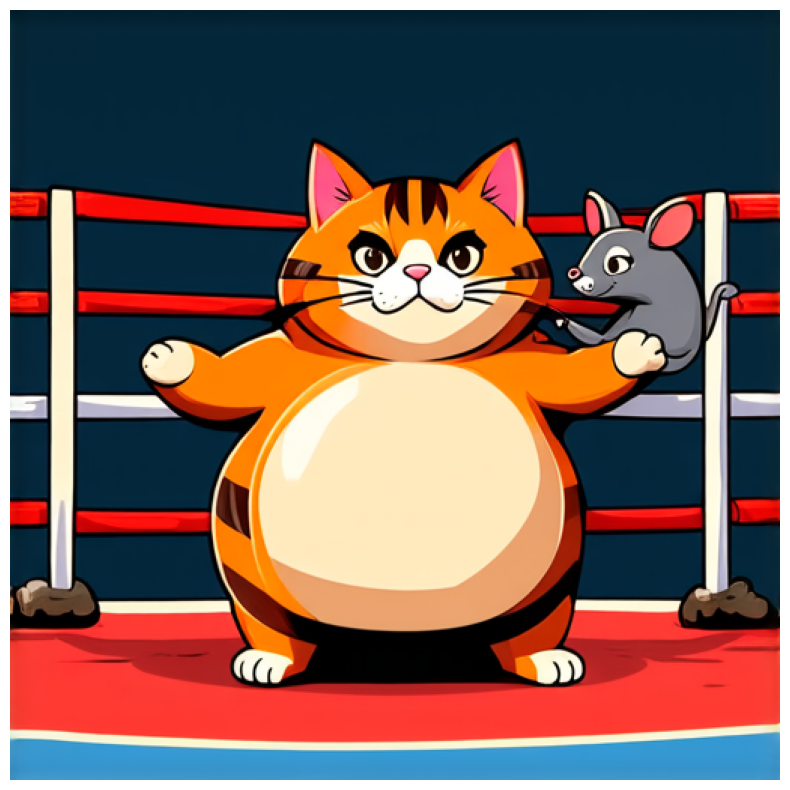

In [ ]:
display_generated_images(generated_image)

## More on Text to Image

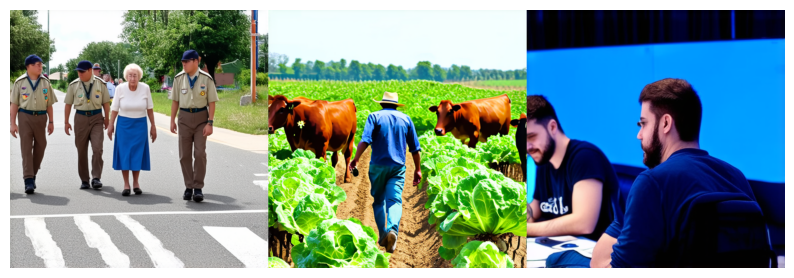

In [ ]:
#let create a bunch of prompts
prompts = ['A group of scouts helping an old lady cross the road', 'A farmer chasing away the cows from his cabbage garden', 'Developers at a hackathon']
generated_images = text_to_image.generate(prompts)
display_generated_images(generated_images)


## I deman for better quality !!!

Cost time (`num_steps=10`): 3.79s
Cost time (`num_steps=28`): 9.86s
Cost time (`num_steps=50`): 17.87s


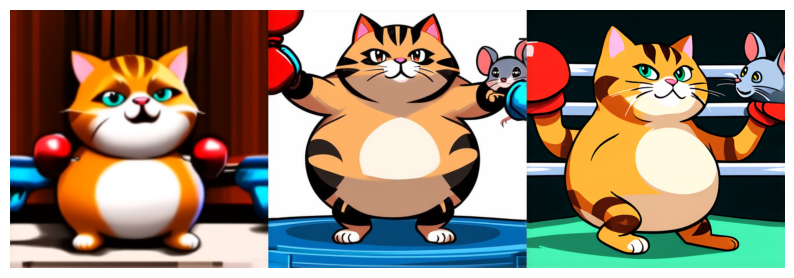

In [ ]:
num_steps = [10, 28, 50]
generated_images = []
for n in num_steps:
    st = time.time()
    generated_images.append(text_to_image.generate(prompt, num_steps=n))
    print(f"Cost time (`num_steps={n}`): {time.time() - st:.2f}s")

display_generated_images(generated_images)

## But I don't want the color you give me!!?

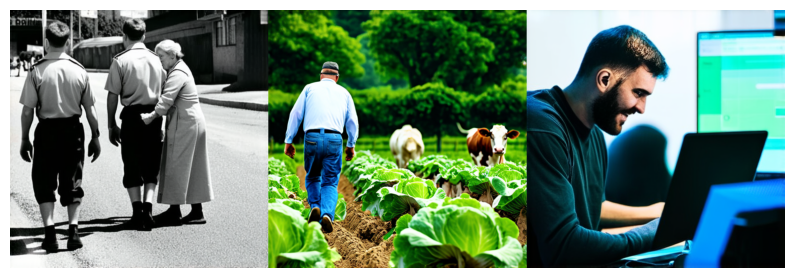

In [ ]:
generated_images = text_to_image.generate(
    {
        "prompts": prompts,
        "negative_prompts": ["Red color"] * 3,
    }
)
display_generated_images(generated_images)

## "Are we even related?", asked guidance_scale.

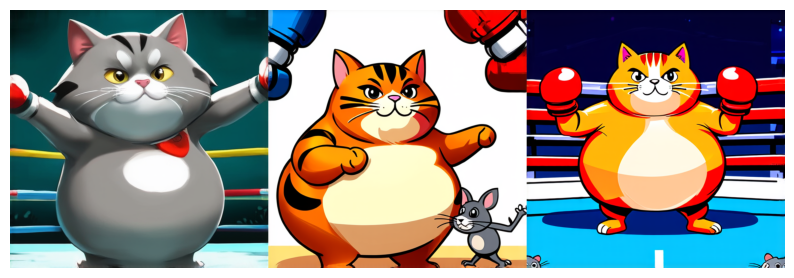

In [ ]:
generated_images = [
    text_to_image.generate(prompt, guidance_scale=2.5),
    text_to_image.generate(prompt, guidance_scale=7.0),
    text_to_image.generate(prompt, guidance_scale=10.5),
]
display_generated_images(generated_images)

# Extras: Stable Diffusion XL with DreamBooth and LoRA



In [ ]:
#check the GPU for CUDA support
!nvidia-smi

Mon Mar  3 13:26:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

We now install the diffuser package

In [ ]:
!pip install --upgrade diffusers[torch] -q

In [ ]:
#import the diffusers package and pytorch
from diffusers import DiffusionPipeline, AutoencoderKL
import torch

In [ ]:
#Loading the Base Model and VAE Decoder
vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix",
    torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.to("cuda");

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# let's test this with a new prompt
prompt = "A person carrying groceries out of the supermarket."

image = pipe(prompt=prompt, num_inference_steps=25, num_images_per_prompt = 4)

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
#let's use our buddy down here who will help us see the images
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

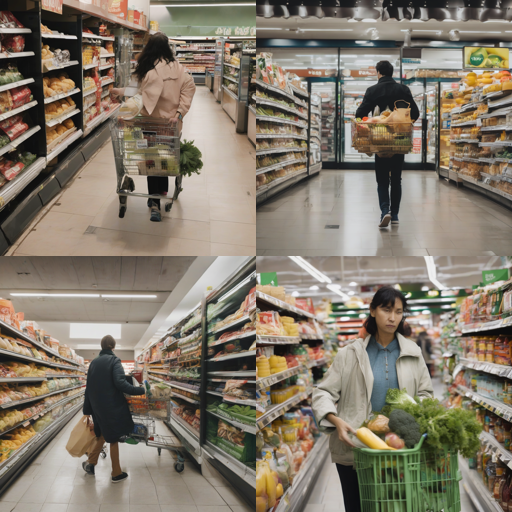

In [ ]:
#let's see what we get, is it an error, I honestly do not know?
image_grid(image.images, 2, 2)

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

text_encoder_2%2Fconfig.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2%2Ftokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

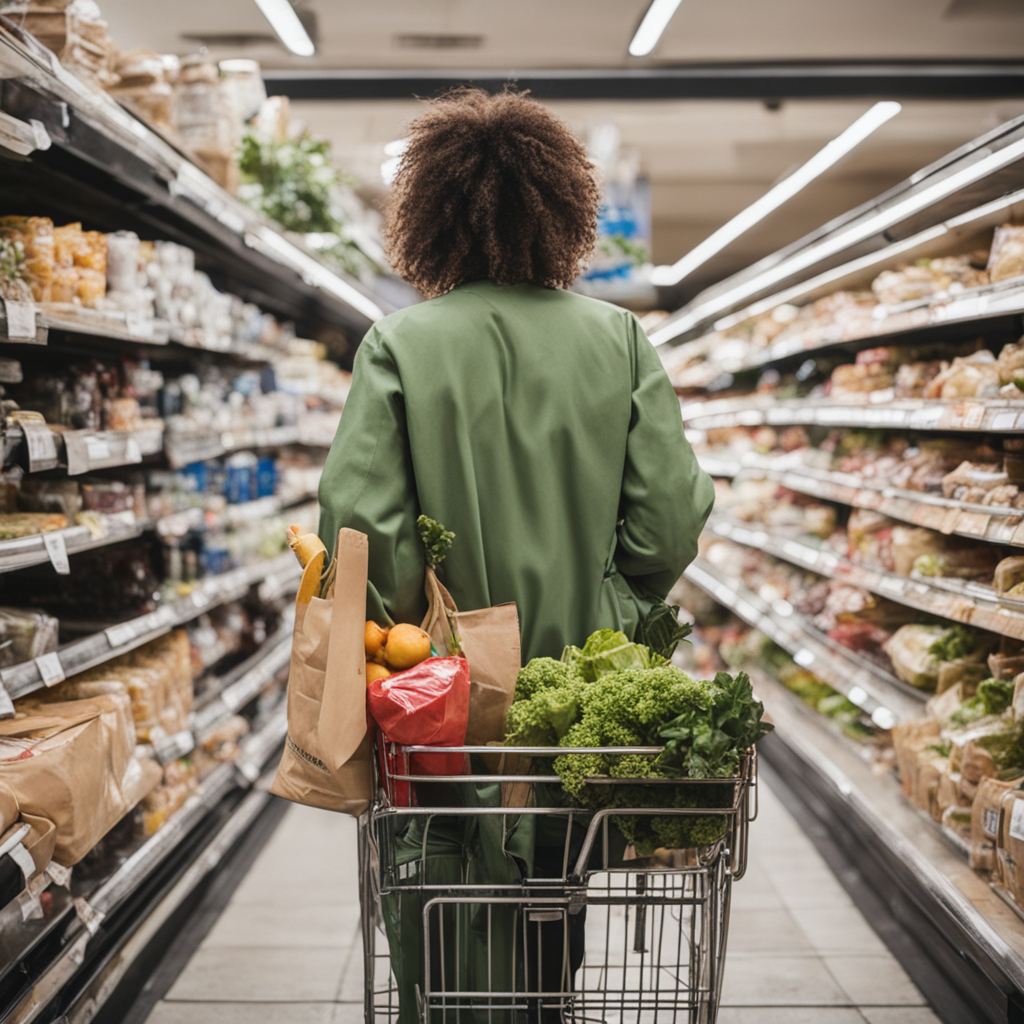

In [ ]:
#let's improve the image quality
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

n_steps = 40
high_noise_frac = 0.7

image = pipe(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images

image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]

image